# Caculation of Barotropic Streamfunction

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cosima_cookbook as cc
from mpl_toolkits.basemap import Basemap, shiftgrid
import numpy as np
import pandas as pd
import netCDF4 as nc

netcdf_index loaded.


In [2]:
from joblib import Memory

memory = Memory(cachedir='/g/data1/v45/cosima-cookbook/', verbose=0)

In [3]:
## Load tx_trans from expt, pick up one year 
tmp = cc.get_nc_variable('mom01v5/KDS75_newbathy_JRA_runoff', 'ocean.nc', 'tx_trans',n=3, time_units = 'days since 1901-01-01').sel(time=slice('1910-01','1910-12')).mean('time').sum('st_ocean', skipna=True)
#tmp = -tmp*1.0e-9
tmp = -tmp
bsf_01_avg = tmp.cumsum('yt_ocean')-tmp.sum('yt_ocean')
#bsf_1 = tmp.cumsum('yt_ocean')
#bsf_2 = tmp.sum('yt_ocean')
#bsf_avg = bsf_1-bsf_2
bsf_01_avg.compute()
del(tmp)

HBox(children=(IntProgress(value=0, description='get_nc_variable:: ', max=3), HTML(value='')))

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [ ]:
## Load tx_trans from expt
tmp = cc.get_nc_variable('access-om2/1deg_jra55_ryf9091_kds75_sss6p5', 'ocean.nc', 'tx_trans',n=0, time_units = 'days since 1700-01-01').sel(time=slice('1890-01','1900-12')).mean('time').sum('st_ocean', skipna=True)
tmp = -tmp*1.0e-9
bsf_10_avg = tmp.cumsum('yt_ocean')-tmp.sum('yt_ocean')
bsf_10_avg.compute()
del(tmp)

HBox(children=(IntProgress(value=0, description='get_nc_variable:: ', max=22), HTML(value='')))

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [ ]:
lon_01 = cc.get_nc_variable('mom01v5/KDS75_newbathy_JRA_runoff', 'ocean.nc', 'xu_ocean',n=1, time_units = 'days since 1900-01-01')
lat_01 = cc.get_nc_variable('mom01v5/KDS75_newbathy_JRA_runoff', 'ocean.nc', 'yt_ocean',n=1, time_units = 'days since 1900-01-01')
tx_trans_01 = cc.get_nc_variable('mom01v5/KDS75_newbathy_JRA_runoff', 'ocean.nc', 'tx_trans',n=1, time_units = 'days since 1900-01-01').isel(time=0).isel(st_ocean=0)
bsf_01_mask = bsf_01_avg.where(tx_trans_01.notnull())
lon_01 = np.array(lon_01, dtype=int)
bsf_01_mask, lon_01 = shiftgrid(0., bsf_01_mask, lon_01, start=True)

HBox(children=(IntProgress(value=0, description='get_nc_variable:: ', max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, description='get_nc_variable:: ', max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, description='get_nc_variable:: ', max=1), HTML(value='')))

/g/data3/hh5/public/apps/miniconda3/envs/analysis3/lib/python3.6/site-packages/dask/array/numpy_compat.py:45: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [ ]:
lon_10 = cc.get_nc_variable('access-om2/1deg_jra55_ryf9091_kds75_sss12', 'ocean.nc', 'xu_ocean',n=1, time_units = 'days since 1900-01-01')
lat_10 = cc.get_nc_variable('access-om2/1deg_jra55_ryf9091_kds75_sss12', 'ocean.nc', 'yt_ocean',n=1, time_units = 'days since 1900-01-01')
tx_trans_10 = cc.get_nc_variable('access-om2/1deg_jra55_ryf9091_kds75_sss12', 'ocean.nc', 'tx_trans',n=1, time_units = 'days since 1900-01-01').isel(time=0).isel(st_ocean=0)
bsf_10_mask = bsf_10_avg.where(tx_trans_10.notnull())
lon_10 = np.array(lon_10, dtype=int)
bsf_10_mask, lon_10 = shiftgrid(0., bsf_10_mask, lon_10, start=True)

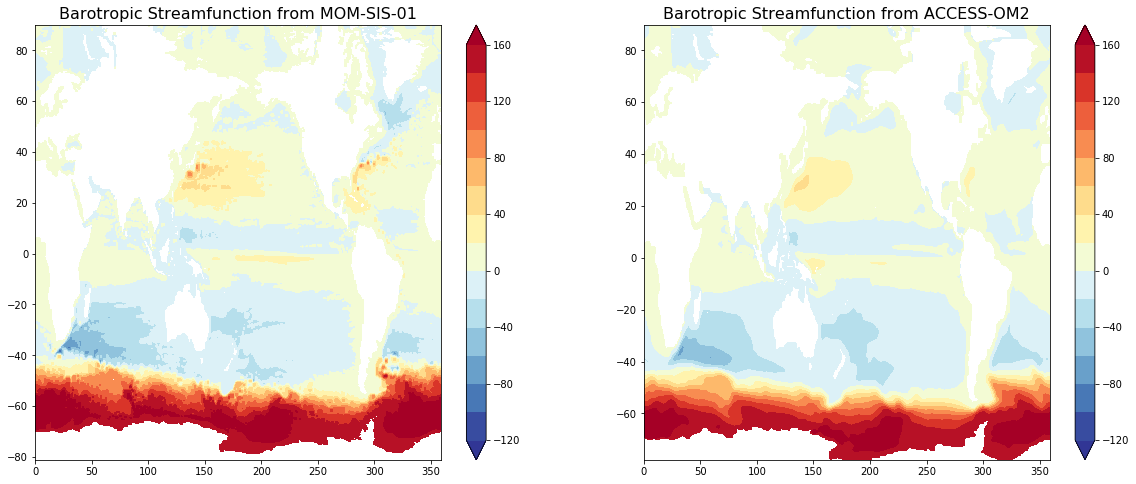

In [7]:
fig = plt.figure(figsize=(20,8))
clev = np.arange(-120,180,20)

ax = fig.add_subplot(1, 2, 1)
cax = plt.contourf(lon_01, lat_01, bsf_01_mask, levels=clev, cmap=plt.cm.RdYlBu_r, extend='both')
plt.colorbar(cax)
#plt.imshow(cax1,'gray')
#cbar.outline.set_linewidth(1)
plt.title('Barotropic Streamfunction from MOM-SIS-01', fontsize=16)

ax = fig.add_subplot(1, 2, 2)
cax = plt.contourf(lon_10, lat_10, bsf_10_mask, levels=clev, cmap=plt.cm.RdYlBu_r, extend='both')
plt.colorbar(cax)
plt.title('Barotropic Streamfunction from ACCESS-OM2', fontsize=16)
#plt.imshow(cax1,'gray')

plt.savefig('bsf.png')